# Capstone Project Code

## Load Packages

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import os
import matplotlib.pyplot as plt
from pandas import Grouper
import tensorflow as tf
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Initial Exploration
- Load Data
- Explore Data Pattern
- Explore Missing Values


### Load Data

In [ ]:
A01_17= pd.read_hdf('/content/drive/MyDrive/pressure_data/A01_CMPR_COMPRESSOR_SUPPLY_PRESSURE_20161231_366days.hdf')

In [ ]:
W01 = pd.read_hdf('/content/drive/MyDrive/weather/WeatherStationController_MeteoCentral_TEMPERATURE_20161231_366days.hdf')

### Explore Data Pattern

In [2]:
def decompose_date_time(df):
  df['day'] = df['Date'].dt.day
  df['month'] = df['Date'].dt.month
  df['year'] = df['Date'].dt.year
  df['hour'] = df['Date'].dt.hour
  df['minute'] = df['Date'].dt.minute
  df['second'] = df['Date'].dt.second

In [39]:
ABS_PATH = '/content/drive/MyDrive/'

def read_and_merge_data(data_type):
  '''
  read_and_merge_data('weather') returns a dictionary that maps
    location to the weather data with columns 'Date' and 'Data'

  read_and_merge_data('pressure_data') returns a dictionary that maps
    location to the pressure data with columns 'Date' and 'Data'
  '''
  path = ABS_PATH + data_type
  os.chdir(path)
  filenames = os.listdir()
  filenames.sort()
  data_ret = {}
  # collect data of the same lcoation
  for i in range(len(filenames)//3):
    curr_files = filenames[i*3:i*3+3]
    if data_type == "weather":
      curr_loc = curr_files[0].split('_')[1]
    else:
      curr_loc = curr_files[0].split('_')[0]

    dfs = []
    for file in curr_files:
      file_path = f"{path}/{file}"
      df = pd.read_hdf(file_path)
      df.reset_index(inplace = True)
      mapping = {df.columns[0]:'Date', df.columns[1]: 'Data'}
      df = df.rename(columns=mapping)
      decompose_date_time(df)
      dfs.append(df)
    data_ret[curr_loc] = pd.concat(dfs)
  return data_ret

In [40]:
weather_data = read_and_merge_data("weather")
pressure_data = read_and_merge_data("pressure_data")

In [ ]:
weather_data

{'MeteoCentral':                           Date    Data  day  month  year  hour  minute  second
 0      2016-12-31 00:00:41.242 -0.5634   31     12  2016     0       0      41
 1      2016-12-31 00:01:41.242 -0.6019   31     12  2016     0       1      41
 2      2016-12-31 00:02:41.242 -0.8165   31     12  2016     0       2      41
 3      2016-12-31 00:03:41.242 -0.8642   31     12  2016     0       3      41
 4      2016-12-31 00:04:41.242 -0.8881   31     12  2016     0       4      41
 ...                        ...     ...  ...    ...   ...   ...     ...     ...
 754772 2019-12-31 23:57:13.286 -0.0365   31     12  2019    23      57      13
 754773 2019-12-31 23:58:11.246 -0.0469   31     12  2019    23      58      11
 754774 2019-12-31 23:58:13.286 -0.0468   31     12  2019    23      58      13
 754775 2019-12-31 23:59:11.246 -0.0487   31     12  2019    23      59      11
 754776 2019-12-31 23:59:13.286 -0.0412   31     12  2019    23      59      13
 
 [1722533 rows x 8 col

In [5]:
tb_weather = weather_data['MeteoTB2']
tb_weather.isna().any()

Date      False
Data      False
day       False
month     False
year      False
hour      False
minute    False
second    False
dtype: bool

In [42]:
central_weather = weather_data['MeteoCentral']
central_weather.isna().any()

Date      False
Data      False
day       False
month     False
year      False
hour      False
minute    False
second    False
dtype: bool

In [ ]:
for key in pressure_data.keys():
  print(pressure_data[key].isna().any())

Date      False
Data      False
day       False
month     False
year      False
hour      False
minute    False
second    False
dtype: bool
Date      False
Data      False
day       False
month     False
year      False
hour      False
minute    False
second    False
dtype: bool
Date      False
Data      False
day       False
month     False
year      False
hour      False
minute    False
second    False
dtype: bool
Date      False
Data      False
day       False
month     False
year      False
hour      False
minute    False
second    False
dtype: bool
Date      False
Data      False
day       False
month     False
year      False
hour      False
minute    False
second    False
dtype: bool
Date      False
Data      False
day       False
month     False
year      False
hour      False
minute    False
second    False
dtype: bool
Date      False
Data      False
day       False
month     False
year      False
hour      False
minute    False
second    False
dtype: bool
Date      False
Data

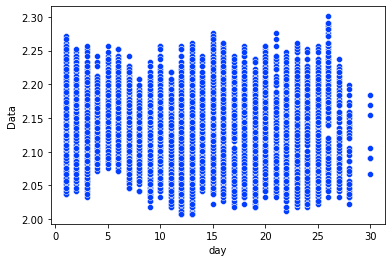

In [43]:
df = pressure_data['A07']
year_data = df[df['year'] == 2017]
month_data = year_data[year_data['month'] == 6]
sns.scatterplot(data = month_data,x='day',y='Data')

In [7]:
from sklearn.ensemble import IsolationForest

In [8]:
import plotly.express as px

In [ ]:
model =  IsolationForest(contamination=0.01)
model.fit(df[['Data']])
df['outliers']=pd.Series(model.predict(df[['Data']])).apply(lambda x: 'yes' if (x == -1) else 'no' )
fig = px.scatter(df.reset_index(), x='Date', y='Data', color='outliers', title='pressure')
fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

In [41]:
central_weather.rename(columns = {'Data':'temp'}, inplace = True)

In [10]:
central_weather['datetime'] = central_weather['Date'].dt.date
weather_train = central_weather.groupby('datetime').mean()

In [16]:
df = pressure_data['A07']
df['datetime'] = df['Date'].dt.date
pressure_train = df.groupby('datetime').mean()
pressure_train.rename(columns = {'Data':'pressure'}, inplace = True)

In [ ]:
pressure_train = pressure_train.reset_index()

In [ ]:
pressure_train.head()

datetime  pressure   day  month    year       hour     minute     second  \
0  2016-12-30  2.193359  30.0   12.0  2016.0  23.000000  51.000000  32.000000   
1  2016-12-31  2.183933  31.0   12.0  2016.0   9.851852  27.324074  32.000000   
2  2017-01-01  2.202798   1.0    1.0  2017.0  11.591549  31.161972  19.852113   
3  2017-01-02  2.187081   2.0    1.0  2017.0  11.285714  30.517857  24.214286   
4  2017-01-03  2.191023   3.0    1.0  2017.0  11.400000  26.350000  51.725000   

   outliers  
0        -1  
1        -1  
2         1  
3         1  
4         1

In [17]:
merged_df = pd.merge(pressure_train, weather_train,  how='left', left_on=['datetime'], right_on = ['datetime'])

In [18]:
merged_df = merged_df.dropna()

In [51]:
merged_df['year_x'].max()

2018.0

In [20]:
from sklearn.ensemble import IsolationForest
train_data = merged_df[['pressure','temp']]
ifm = IsolationForest(contamination=0.04)
ifm.fit(train_data)
y_pred_train = ifm.predict(train_data)

[Text(0.5, 1.0, 'temperature vs. pressure')]

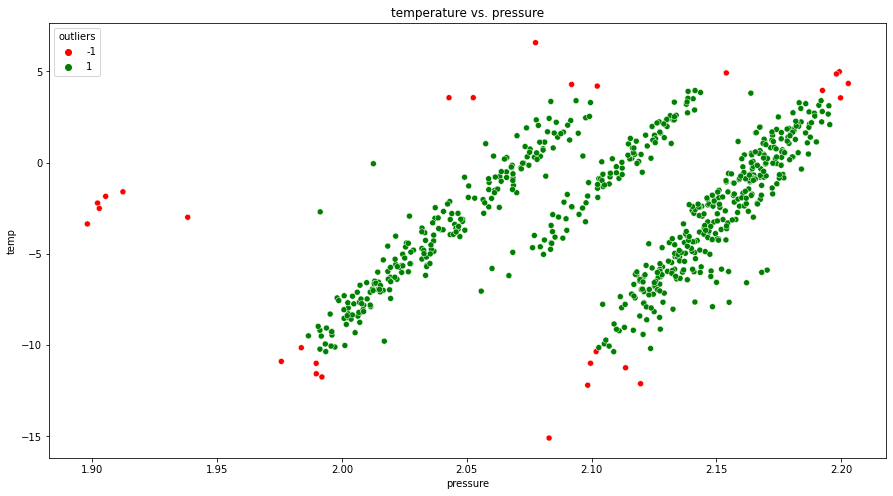

In [27]:
sns.color_palette("bright")
plt.figure(figsize=(15,8))
train_data['outliers']=y_pred_train
sns.scatterplot(data=train_data, x='pressure', y = 'temp', hue='outliers', palette=['r', 'g']).set(title='temperature vs. pressure')

In [15]:
import plotly.express as px
train_data['outliers']=y_pred_train
fig = px.scatter(train_data, x='pressure', y='temp', color='outliers', title='pressure')

fig.show()

In [ ]:
hourly_a07= df.set_index('Date').resample('H').mean().reset_index()

In [ ]:
pressure_train['startdate'] =  pd.to_datetime('2016-12-01')

In [ ]:
pressure_train['datetime'] = pd.to_datetime(pressure_train['datetime'])

In [ ]:
from sklearn.ensemble import IsolationForest
import plotly.express as px
ifm = IsolationForest(contamination=0.04)
pressure_train['days'] = (pressure_train['datetime'] -pressure_train['startdate']).dt.days
train_data = pressure_train[['days','pressure']]
ifm.fit(train_data)
y_pred_train = ifm.predict(train_data)
train_data['outliers']=y_pred_train
fig = px.scatter(train_data, x='days', y='pressure', color='outliers', title='pressure')

fig.show()

In [55]:
hourly_a07= df.set_index('Date').resample('H').mean().reset_index()
hourly_central = central_weather.set_index('Date').resample('H').mean().reset_index()

In [57]:
merged_hourly = pd.merge(hourly_a07, hourly_central,  how='left', left_on=['Date'], right_on = ['Date'])

In [59]:
merged_hourly.head()

Date    Data_x  day_x  month_x  year_x  hour_x  minute_x  \
1 2016-12-31 00:00:00  2.142090   31.0     12.0  2016.0     0.0      25.5   
2 2016-12-31 01:00:00  2.140462   31.0     12.0  2016.0     1.0      25.5   
3 2016-12-31 02:00:00  2.175456   31.0     12.0  2016.0     2.0      25.5   
4 2016-12-31 03:00:00  2.161621   31.0     12.0  2016.0     3.0      25.5   
5 2016-12-31 04:00:00  2.181559   31.0     12.0  2016.0     4.0      25.5   

   second_x    Data_y  day_y  month_y  year_y  hour_y  minute_y  second_y  
1      29.5 -1.314713   31.0     12.0  2016.0     0.0      29.5      41.0  
2      29.5 -0.877382   31.0     12.0  2016.0     1.0      29.5      41.0  
3      29.5  0.515823   31.0     12.0  2016.0     2.0      29.5      41.0  
4      29.5  1.922292   31.0     12.0  2016.0     3.0      29.5      41.0  
5      29.5  1.194828   31.0     12.0  2016.0     4.0      29.5      41.0

[Text(0.5, 1.0, 'temperature vs. pressure')]

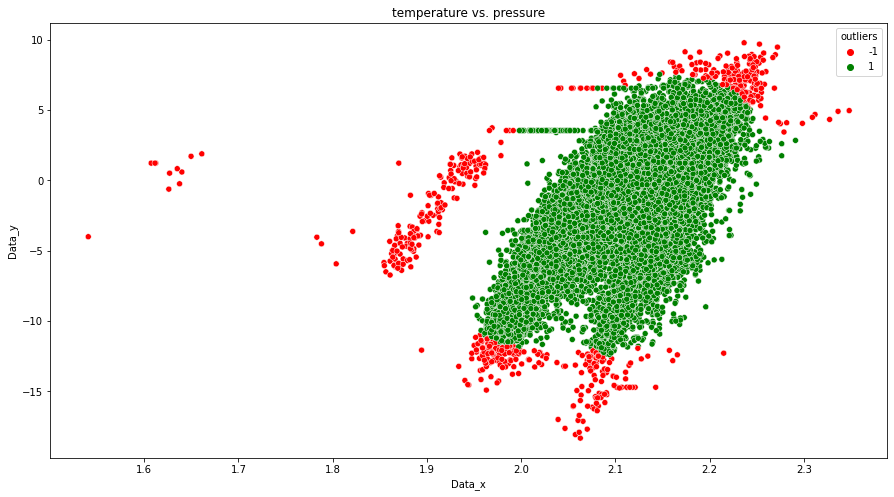

In [60]:
merged_hourly = merged_hourly.dropna()
from sklearn.ensemble import IsolationForest
train_data = merged_hourly[['Data_x','Data_y']]
ifm = IsolationForest(contamination=0.04)
ifm.fit(train_data)
y_pred_train = ifm.predict(train_data)

sns.color_palette("bright")
plt.figure(figsize=(15,8))
train_data['outliers']=y_pred_train
sns.scatterplot(data=train_data, x='Data_x', y = 'Data_y', hue='outliers', palette=['r', 'g']).set(title='temperature vs. pressure')

## Linear model

In [ ]:
df = pressure_data['A01'][['Data']]
column_indices = {name: i for i, name in enumerate(df.columns)}
df.reset_index()
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [ ]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
def plot(self, model=None, plot_col='Data', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['Data'])
single_step_window

Using Facebook Prophet Time Series package

In [ ]:
from prophet import Prophet

In [ ]:
def change_columns(df):
  df['ds'] = df['Date']
  df['y'] = df['Data']
  return df

In [ ]:
def fit_predict_model(dataframe, interval_width = 0.99, changepoint_range = 0.8):
  m = Prophet(daily_seasonality = False, yearly_seasonality = False, weekly_seasonality = False,
              seasonality_mode = 'additive',
              interval_width = interval_width,
              changepoint_range = changepoint_range)
  m = m.fit(dataframe)
  forecast = m.predict(dataframe)
  forecast['fact'] = dataframe['Data'].reset_index(drop = True)
  return forecast
  
df = change_columns(pressure_data['A01'])
pred = fit_predict_model(df)

In [ ]:
def detect_anomalies(forecast):
  forecasted = forecast[['ds','trend', 'yhat', 'yhat_lower', 'yhat_upper', 'fact']].copy()
  forecasted['anomaly'] = 0
  forecasted.loc[forecasted['fact'] > forecasted['yhat_upper'], 'anomaly'] = 1
  forecasted.loc[forecasted['fact'] < forecasted['yhat_lower'], 'anomaly'] = -1
  #anomaly importances
  forecasted['importance'] = 0
  forecasted.loc[forecasted['anomaly'] ==1, 'importance'] = \
    (forecasted['fact'] - forecasted['yhat_upper'])/forecast['fact']
  forecasted.loc[forecasted['anomaly'] ==-1, 'importance'] = \
    (forecasted['yhat_lower'] - forecasted['fact'])/forecast['fact']
  forecasted['anomaly'] = forecasted['anomaly'].astype('category')
  return forecasted
  
pred = detect_anomalies(pred)

In [ ]:
def prophet_pipeline(location):
  df = change_columns(pressure_data[location])
  pred = fit_predict_model(df)
  return detect_anomalies(pred)
pred = prophet_pipeline('A01')

In [ ]:
sns.set_palette("bright")
plt.figure(figsize=(15,8))
sns.scatterplot(data=pred, x='ds', y = 'fact', hue='anomaly')
# sample output below:
# green represents abnormally high values 
# blue represents abnormally low values

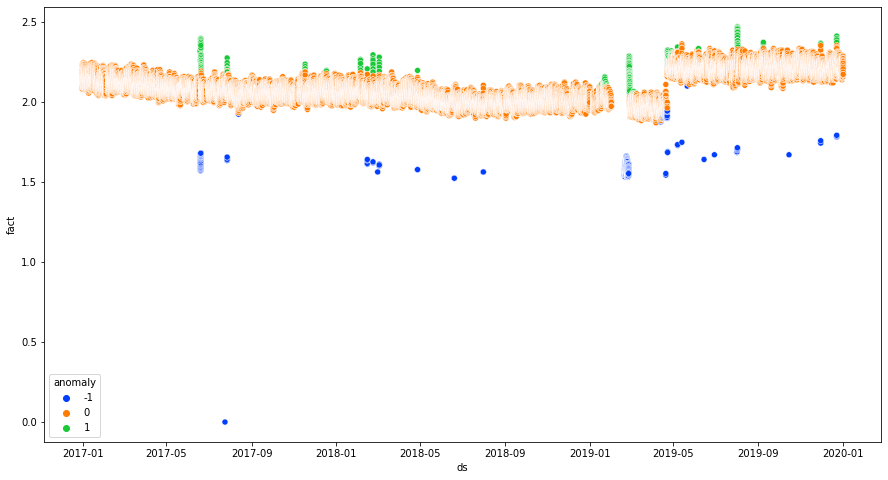